### Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import scipy.stats as scs
import warnings
warnings.filterwarnings("ignore") 
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import itertools
warnings.filterwarnings("ignore") # отключает предупреждения

In [71]:
data = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [72]:
data_m = data.resample('M').mean()

### Подберите параметры модели SARIMAX для этого ряда.

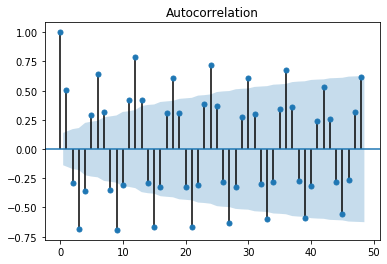

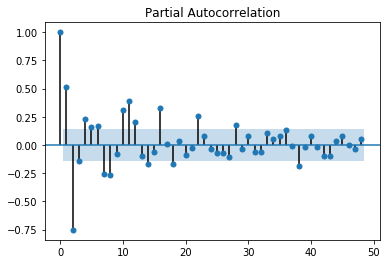

In [73]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=48)
plt.show()
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=48)
plt.show()

* ACF (определит q) и PACF (определит p)
* сезонность 6 или 12 
* p - от 1 до 3 включительно
* q - не знаю. поставлю 0-3. пыталась ставить больше, функция отработала ночь и не закончила работу о_0
* d - тоже не знаю. видимо от 0 до 3ех. наверное. 
* ps 1 - 4

In [74]:
p = [1,2,3] # глубина истории
d = [0,1,2] # порядок интегрированного ряда
q = [0,1,2]  # сглаживание
pdq = list(itertools.product(p, d, q))

ps = [1,2,3,4]
ds = [0,1,2]
qs = [0,1,2]
seasonal_pdq = list(itertools.product(p, d, q, [6, 12]))

In [75]:
aic = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[-200:-12],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            
            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
            aic.append([param, param_seasonal, results.aic])
        except:
            continue

ARIMA(1, 0, 0)x(1, 0, 0, 6)3 - AIC:3370.069643869734
ARIMA(1, 0, 0)x(1, 0, 0, 12)3 - AIC:3230.727243877621
ARIMA(1, 0, 0)x(1, 0, 1, 6)3 - AIC:3356.774899545084
ARIMA(1, 0, 0)x(1, 0, 1, 12)3 - AIC:3128.083159792068
ARIMA(1, 0, 0)x(1, 0, 2, 6)3 - AIC:3230.794657807946
ARIMA(1, 0, 0)x(1, 0, 2, 12)3 - AIC:3004.8784685492483
ARIMA(1, 0, 0)x(1, 1, 0, 6)3 - AIC:3105.5213772217385
ARIMA(1, 0, 0)x(1, 1, 0, 12)3 - AIC:2894.867003554299
ARIMA(1, 0, 0)x(1, 1, 1, 6)3 - AIC:3105.1814488751843
ARIMA(1, 0, 0)x(1, 1, 1, 12)3 - AIC:2895.1144426355995
ARIMA(1, 0, 0)x(1, 1, 2, 6)3 - AIC:2980.0929940423744
ARIMA(1, 0, 0)x(1, 1, 2, 12)3 - AIC:2669.510274996097
ARIMA(1, 0, 0)x(1, 2, 0, 6)3 - AIC:3124.5054608749488
ARIMA(1, 0, 0)x(1, 2, 0, 12)3 - AIC:2814.0104570447766
ARIMA(1, 0, 0)x(1, 2, 1, 6)3 - AIC:3086.4452898794975
ARIMA(1, 0, 0)x(1, 2, 1, 12)3 - AIC:2766.609518580167
ARIMA(1, 0, 0)x(1, 2, 2, 6)3 - AIC:2968.273112400723
ARIMA(1, 0, 0)x(1, 2, 2, 12)3 - AIC:2534.0118940330626
ARIMA(1, 0, 0)x(2, 0, 0, 6)3

In [76]:
aics = pd.DataFrame(data= aic) 
aics.head()

,0,1,2
0,"(1, 0, 0)","(1, 0, 0, 6)",3370.069644
1,"(1, 0, 0)","(1, 0, 0, 12)",3230.727244
2,"(1, 0, 0)","(1, 0, 1, 6)",3356.774900
3,"(1, 0, 0)","(1, 0, 1, 12)",3128.083160
4,"(1, 0, 0)","(1, 0, 2, 6)",3230.794658


In [77]:
aics.loc[aics.iloc[:,2]==min(aics.iloc[:,2])]

,0,1,2
1241,"(3, 1, 1)","(3, 2, 2, 12)",2222.0072


минимальная ошибка при (3, 2, 2, 12) - 2222.0072

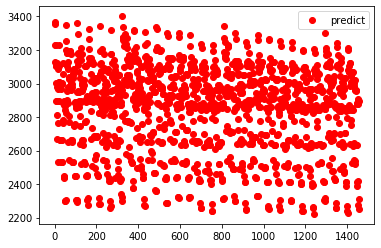

In [78]:
plt.plot(aics.iloc[:,2],'or', label='predict' )
plt.legend()

plt.show()

In [111]:
aics_ = aics.groupby([1])[2].std()
aics_.loc[aics_.values<30]

1
(1, 2, 2, 12)    29.051027
(2, 2, 0, 12)    28.892588
(3, 1, 0, 12)    28.882796
(3, 1, 2, 12)    27.557175
(3, 2, 0, 12)    28.548773
Name: 2, dtype: float64

In [115]:
# распределение для (3, 2, 2, 12) когда минимальная ошибка
aics_.loc[aics_.index==(3, 2, 2, 12)]

1
(3, 2, 2, 12)    38.628454
Name: 2, dtype: float64

получается, минимальное значение распределения при (3, 1, 2, 12) . <br>
если смотреть по постоянству, то наилучшие результаты: 
(3, 1, 0, 12), (3, 1, 2, 12), (1, 2, 2, 12), (2, 2, 0, 12),(3, 2, 0, 12) <br>
посмотрим для этих значений средний  <br>

In [116]:
aics__ = aics.loc[(aics.iloc[:,1]==(1, 2, 2, 12))|(aics.iloc[:,1]== (2, 2, 0, 12))|(aics.iloc[:,1]==(3, 1, 0, 12))|(aics.iloc[:,1]==(3, 1, 2, 12))|(aics.iloc[:,1]==(3, 2, 0, 12))|(aics.iloc[:,1]==(3, 2, 2, 12))].groupby([1])[2].mean()
aics__

1
(1, 2, 2, 12)    2513.270075
(2, 2, 0, 12)    2533.274843
(3, 1, 0, 12)    2438.431653
(3, 1, 2, 12)    2433.256366
(3, 2, 0, 12)    2302.755554
(3, 2, 2, 12)    2289.075172
Name: 2, dtype: float64

просто минимальное значение ошибки при (3, 2, 2, 12) - и при нем же минимальное среднее. но его мы отвергаем, у него распределение большое<br>
второй минимальный средний  после (3, 2, 2, 12) у нас выходит при (3, 2, 0, 12) <br>
минимальное распределение при (3, 1, 2, 12)<br>
в целом все значения близки. и по сложности вероятно(???) (3, 2, 0, 12) проще. возьмем ее.

In [81]:
aics.loc[(aics.iloc[:,1]==(3, 2, 0, 12))]

,0,1,2
49,"(1, 0, 0)","(3, 2, 0, 12)",2301.602456
103,"(1, 0, 1)","(3, 2, 0, 12)",2302.442668
157,"(1, 0, 2)","(3, 2, 0, 12)",2304.529422
211,"(1, 1, 0)","(3, 2, 0, 12)",2314.157363
265,"(1, 1, 1)","(3, 2, 0, 12)",2298.492383
319,"(1, 1, 2)","(3, 2, 0, 12)",2342.514665
373,"(1, 2, 0)","(3, 2, 0, 12)",2375.785349
427,"(1, 2, 1)","(3, 2, 0, 12)",2312.202511
481,"(1, 2, 2)","(3, 2, 0, 12)",2364.640651
535,"(2, 0, 0)","(3, 2, 0, 12)",2284.410823


In [119]:
_ = aics.loc[(aics.iloc[:,1]==(3, 2, 0, 12))].groupby([1])[2].min()
_

1
(3, 2, 0, 12)    2262.440917
Name: 2, dtype: float64

минимальное значение ошибки при (3, 1, 1) - 2262.440917 <br>
но если мы берем по простоте, то надо брать (1, 0, 0)	2301.602456<br>
построим модель

In [120]:
mod = sm.tsa.statespace.SARIMAX((data['PJME_MW'].values[-200:-12]),
                                          order=[1, 0, 0],seasonal_order=[3, 2, 0, 12],
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
results = mod.fit()    

In [121]:
print(results.summary().tables[0],results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  188
Model:             SARIMAX(1, 0, 0)x(3, 2, 0, 12)   Log Likelihood               -1015.141
Date:                            Wed, 13 May 2020   AIC                           2040.283
Time:                                    12:48:42   BIC                           2054.504
Sample:                                         0   HQIC                          2046.061
                                            - 188                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

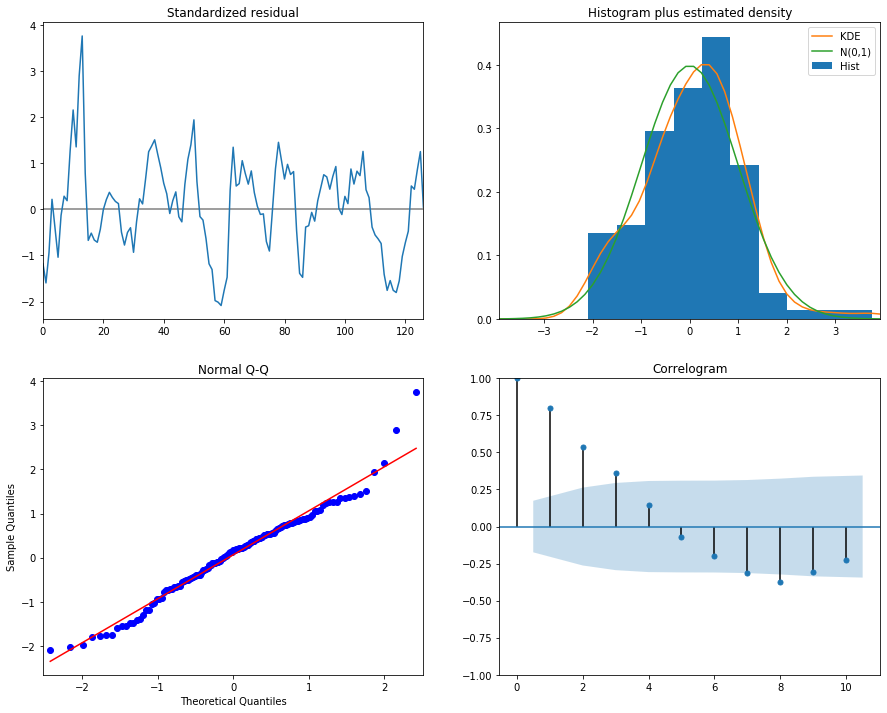

In [122]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

#### Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Лучшие результаты на недельных данных параметры модели SARIMA(0,0, 1)x(1, 1, 2, 52) - AIC:14254.93

На месячных данных лучшие параметры (1, 0, 0)х(3, 2, 0, 12) - AIC:2301.602456

на месячных даннх модель лучше

#### Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках )

In [85]:
COVID_ = pd.read_csv('covid_19_data.csv')
COVID_.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [86]:
COVID_.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
19923,19924,04/29/2020,Wyoming,US,2020-04-30 02:32:27,545.0,7.0,0.0
19924,19925,04/29/2020,Xinjiang,Mainland China,2020-04-30 02:32:27,76.0,3.0,73.0
19925,19926,04/29/2020,Yukon,Canada,2020-04-30 02:32:27,11.0,0.0,0.0
19926,19927,04/29/2020,Yunnan,Mainland China,2020-04-30 02:32:27,185.0,2.0,181.0
19927,19928,04/29/2020,Zhejiang,Mainland China,2020-04-30 02:32:27,1268.0,1.0,1263.0


In [87]:
COVID_.describe()

,SNo,Confirmed,Deaths,Recovered
count,19928.000000,19928.000000,19928.000000,19928.000000
mean,9964.500000,3550.325472,219.624147,927.807607
std,5752.862418,17033.481526,1572.904962,6605.789443
min,1.000000,0.000000,0.000000,0.000000
25%,4982.750000,11.000000,0.000000,0.000000
50%,9964.500000,118.000000,1.000000,2.000000
75%,14946.250000,787.000000,10.000000,86.250000
max,19928.000000,299691.000000,27682.000000,132929.000000


In [88]:
COVID_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19928 entries, 0 to 19927
Data columns (total 8 columns):
SNo                19928 non-null int64
ObservationDate    19928 non-null object
Province/State     9746 non-null object
Country/Region     19928 non-null object
Last Update        19928 non-null object
Confirmed          19928 non-null float64
Deaths             19928 non-null float64
Recovered          19928 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.2+ MB


In [89]:
COVID = COVID_.copy()
COVID_['Data']= pd.to_datetime(COVID_['ObservationDate']) #.dt.date
COVID['Data']= pd.to_datetime(COVID['ObservationDate']) #.dt.date

In [90]:
COVID = COVID.groupby(['Data','Country/Region'])['Confirmed','Deaths','Recovered'].sum()

In [91]:
COVID.tail(20)

Confirmed   Deaths  Recovered
Data       Country/Region                                     
2020-04-29 Thailand                 2947.0     54.0     2665.0
           Timor-Leste                24.0      0.0        6.0
           Togo                      109.0      7.0       64.0
           Trinidad and Tobago       116.0      8.0       71.0
           Tunisia                   980.0     40.0      294.0
           Turkey                 117589.0   3081.0    44040.0
           UK                     166441.0  26166.0      857.0
           US                    1039909.0  60967.0   120720.0
           Uganda                     81.0      0.0       52.0
           Ukraine                  9866.0    250.0     1103.0
           United Arab Emirates    11929.0     98.0     2329.0
           Uruguay                   630.0     15.0      412.0
           Uzbekistan               2002.0      9.0     1096.0
           Venezuela                 331.0     10.0      142.0
           Vietnam                   270.0      0.0      222.0
           West Bank and Gaza        344.0      2.0       71.0
           Western Sahara              6.0      0.0        5.0
           Yemen                       6.0      0.0        1.0
           Zambia                     97.0      3.0       54.0
           Zimbabwe                   32.0      4.0        5.0

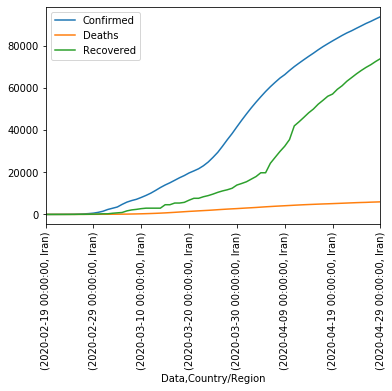

In [92]:
COVID.loc[COVID.index.get_level_values('Country/Region')=='Iran', ['Confirmed','Deaths','Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

In [93]:
# первая разность
X1 = COVID.loc[COVID.index.get_level_values('Country/Region')=='Iran', ['Confirmed','Deaths','Recovered']].diff(1).values
X1[0,:] = 0
X1.shape

(71, 3)

In [94]:
# сам ряд
X2 = COVID.loc[COVID.index.get_level_values('Country/Region')=='Iran', ['Confirmed','Deaths','Recovered']].values 
X2.shape

(71, 3)

In [95]:
X3 = COVID.iloc[COVID.index.get_level_values('Country/Region')=='Iran'].index.get_level_values( 'Data')
X3_1 = pd.to_datetime(X3).dayofweek
X3_2 = pd.to_datetime(X3).dayofyear -  pd.to_datetime(X3[0]).dayofyear
X3.shape, X3_1.shape, X3_2.shape 

((71,), (71,), (71,))

In [96]:
XX = np.concatenate([X1,X2], axis= 1)
XX = np.concatenate([XX,np.array(X3_1).reshape((X1.shape[0],1))], axis= 1)
XX = np.concatenate([XX,np.array(X3_2).reshape((X1.shape[0],1))], axis= 1)
COVID_Data = pd.DataFrame(data= XX, index= X3)
XX.shape

(71, 8)

In [97]:
# 0,1,2 первая разность
# 3,4,5 сами значения
# 6 день недели, 7 день года
COVID_Data.head(10)

,0,1,2,3,4,5,6,7
Data,,,,,,,,
2020-02-19,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0
2020-02-20,3.0,0.0,0.0,5.0,2.0,0.0,3.0,1.0
2020-02-21,13.0,2.0,0.0,18.0,4.0,0.0,4.0,2.0
2020-02-22,10.0,1.0,0.0,28.0,5.0,0.0,5.0,3.0
2020-02-23,15.0,3.0,0.0,43.0,8.0,0.0,6.0,4.0
2020-02-24,18.0,4.0,0.0,61.0,12.0,0.0,0.0,5.0
2020-02-25,34.0,4.0,0.0,95.0,16.0,0.0,1.0,6.0
2020-02-26,44.0,3.0,49.0,139.0,19.0,49.0,2.0,7.0
2020-02-27,106.0,7.0,0.0,245.0,26.0,49.0,3.0,8.0


In [98]:
p = 3 # 10 дней назад по истории
h=1    # 1 день вперед предсказываем

In [99]:
y = COVID_Data.iloc[h+p:,0]
y.head()

Data
2020-02-23     15.0
2020-02-24     18.0
2020-02-25     34.0
2020-02-26     44.0
2020-02-27    106.0
Name: 0, dtype: float64

In [100]:
X =[]
for i in range(len(y)):
    xx = XX[i:i+p,:]
    X.append(xx.reshape(8*p))

In [101]:
X = np.array(X).reshape((COVID_Data.shape[0]-p-h,8*p))
y=np.array(y).reshape((COVID_Data.shape[0]-p-h,1))
X.shape, y.shape

((67, 24), (67, 1))

In [102]:
data_model = X[:,0]

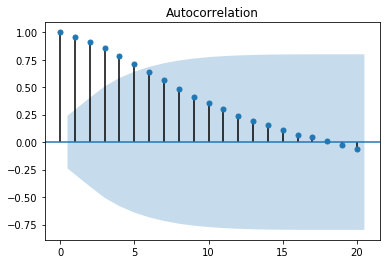

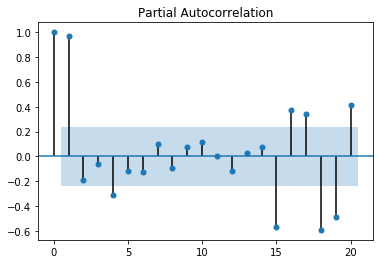

In [103]:
sm.graphics.tsa.plot_acf(data_model, lags=20)
plt.show()
sm.graphics.tsa.plot_pacf(data_model, lags=20)
plt.show()

* ACF (определит q) и PACF (определит p)
* p - 2
* q - 5 похоже
* d - поставлю 0

In [104]:
p, d, q = 2,0,5
N=10

In [105]:
model = ARIMA(data_model[:-N], order=(p, d, q))
model_fit = model.fit(disp=False)
y_p = model_fit.predict(len(data_model[:-N]), len(data_model[:-N]))
y_f = model_fit.forecast(2*N)

#### Оцените результат моделирования

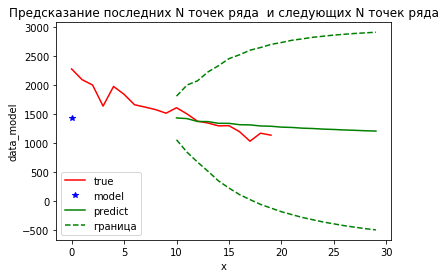

In [106]:
plt.plot(data_model[-10-N:],'r',label ='true')
plt.plot(y_p,'*b',label ='model')
plt.plot(np.arange(2*N)+N,y_f[0],'g',label ='predict')
plt.plot(np.arange(2*N)+N,y_f[2][:,1],'--g', label = 'граница')
plt.plot(np.arange(2*N)+N,y_f[2][:,0],'--g')
plt.xlabel('x')
plt.ylabel('data_model')
plt.title('Предсказание последних N точек ряда  и следующих N точек ряда')
plt.legend()
plt.show()

#### Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA.